### 라인 그래프를 그려보자


In [2]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [3]:
import matplotlib.pyplot as plt

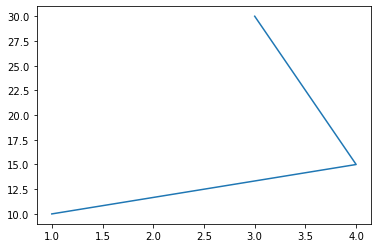

In [7]:
plt.plot([1,4,3],[10,15,30]);
# 세미클론이 있으면 더러운 리턴값이 없어진다.

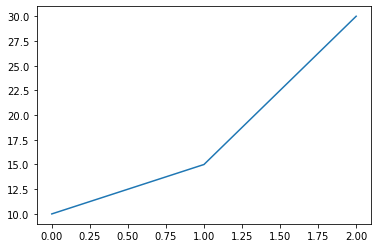

In [9]:
plt.plot([10,15,30]);

$y=2x^(2) -5x +8$

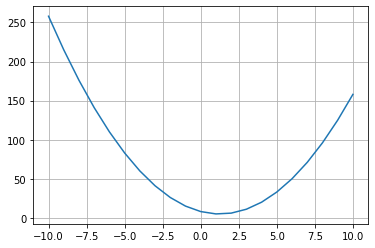

In [19]:
xs = []
ys = []
for x in range(-10,11):
    y = 2*pow(x,2)- 5*x +8
    xs.append(x)
    ys.append(y)

plt.plot(xs,ys)
plt.grid()

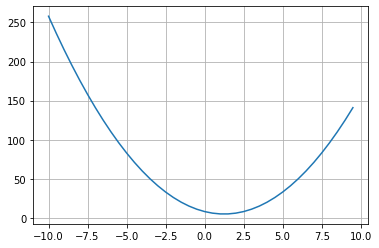

In [32]:
import numpy as np

x = np.arange(-10,10,0.5)
y = 2*pow(x,2)- 5*x +8

#     xs.append(x)
#     ys.append(y)


plt.plot(x,y)
plt.grid()

#### sine 그래프

In [34]:
import math

rad = math.pi
math.sin(rad)

1.2246467991473532e-16

In [36]:
math.radians(180)

3.141592653589793

In [81]:
xs = []
ys = []
for degree in range(0,360+1,1):
    rad = math.radians(degree)
    y = math.sin(rad)
    xs.append(degree)
    ys.append(y)


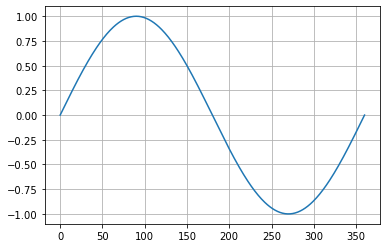

In [82]:
plt.plot(xs,ys)
plt.grid()

In [72]:
deg = np.arange(0,360,1)
rad = np.radians(deg)
y = np.sin(rad)



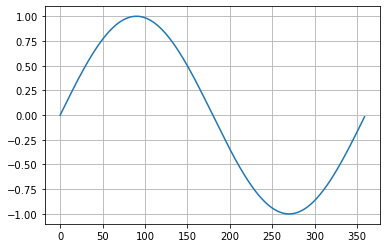

In [74]:
plt.plot(deg,y)
plt.grid()

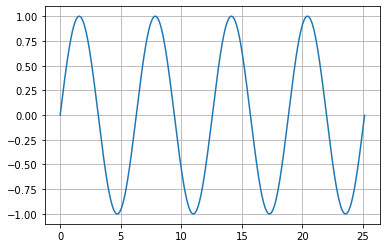

In [102]:
rads = np.arange(0,(np.pi*2)*4,0.01)
y = np.sin(rads)
plt.plot(rads,y)
plt.grid()

In [96]:
np.linspace(0,10,11)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

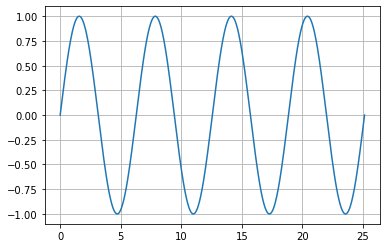

In [105]:
rads = np.linspace(0,(np.pi*2)*4,1000)
y = np.sin(rads)
plt.plot(rads,y)
plt.grid()

In [104]:
np.linspace(0,10,11)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

### cos그래프

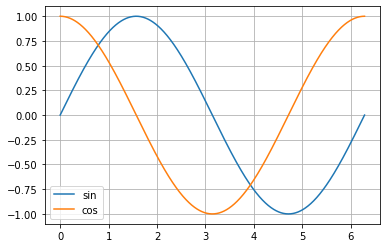

In [117]:
rads = np.linspace(0,(np.pi*2),1000)
y1 = np.sin(rads)
y2 = np.cos(rads)
plt.plot(rads,y1, label = "sin")
plt.plot(rads,y2, label = "cos")

plt.legend()
plt.grid()

### sin(x)+0.9sin(2x) 

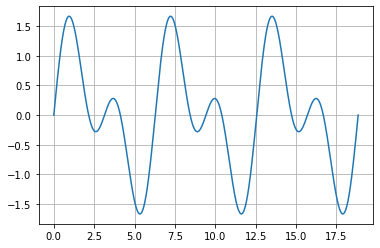

In [120]:
rads = np.linspace(0,(np.pi*6),1000)
y1 = np.sin(rads)+0.9*np.sin(rads*2)
plt.plot(rads,y1)
plt.grid()

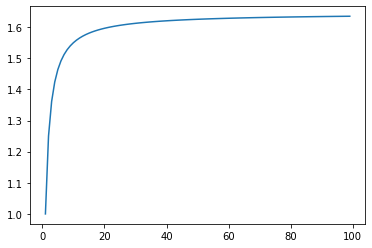

In [124]:
xs = []
ys = []
acc = 0.0
for i in range(1,100):
    acc +=  1 / (i*i)
    xs.append(i)
    ys.append(acc)
plt.plot(xs,ys)

In [125]:
import itertools
from collections import OrderedDict
from functools import partial

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from cycler import cycler


def filled_hist(ax, edges, values, bottoms=None, orientation='v',
                **kwargs):
    """
    Draw a histogram as a stepped patch.

    Extra kwargs are passed through to `fill_between`

    Parameters
    ----------
    ax : Axes
        The axes to plot to

    edges : array
        A length n+1 array giving the left edges of each bin and the
        right edge of the last bin.

    values : array
        A length n array of bin counts or values

    bottoms : float or array, optional
        A length n array of the bottom of the bars.  If None, zero is used.

    orientation : {'v', 'h'}
       Orientation of the histogram.  'v' (default) has
       the bars increasing in the positive y-direction.

    Returns
    -------
    ret : PolyCollection
        Artist added to the Axes
    """
    print(orientation)
    if orientation not in 'hv':
        raise ValueError("orientation must be in {{'h', 'v'}} "
                         "not {o}".format(o=orientation))

    kwargs.setdefault('step', 'post')
    edges = np.asarray(edges)
    values = np.asarray(values)
    if len(edges) - 1 != len(values):
        raise ValueError('Must provide one more bin edge than value not: '
                         'len(edges): {lb} len(values): {lv}'.format(
                             lb=len(edges), lv=len(values)))

    if bottoms is None:
        bottoms = 0
    bottoms = np.broadcast_to(bottoms, values.shape)

    values = np.append(values, values[-1])
    bottoms = np.append(bottoms, bottoms[-1])
    if orientation == 'h':
        return ax.fill_betweenx(edges, values, bottoms,
                                **kwargs)
    elif orientation == 'v':
        return ax.fill_between(edges, values, bottoms,
                               **kwargs)
    else:
        raise AssertionError("you should never be here")


def stack_hist(ax, stacked_data, sty_cycle, bottoms=None,
               hist_func=None, labels=None,
               plot_func=None, plot_kwargs=None):
    """
    Parameters
    ----------
    ax : axes.Axes
        The axes to add artists too

    stacked_data : array or Mapping
        A (N, M) shaped array.  The first dimension will be iterated over to
        compute histograms row-wise

    sty_cycle : Cycler or operable of dict
        Style to apply to each set

    bottoms : array, default: 0
        The initial positions of the bottoms.

    hist_func : callable, optional
        Must have signature `bin_vals, bin_edges = f(data)`.
        `bin_edges` expected to be one longer than `bin_vals`

    labels : list of str, optional
        The label for each set.

        If not given and stacked data is an array defaults to 'default set {n}'

        If stacked_data is a mapping, and labels is None, default to the keys
        (which may come out in a random order).

        If stacked_data is a mapping and labels is given then only
        the columns listed by be plotted.

    plot_func : callable, optional
        Function to call to draw the histogram must have signature:

          ret = plot_func(ax, edges, top, bottoms=bottoms,
                          label=label, **kwargs)

    plot_kwargs : dict, optional
        Any extra kwargs to pass through to the plotting function.  This
        will be the same for all calls to the plotting function and will
        over-ride the values in cycle.

    Returns
    -------
    arts : dict
        Dictionary of artists keyed on their labels
    """
    # deal with default binning function
    if hist_func is None:
        hist_func = np.histogram

    # deal with default plotting function
    if plot_func is None:
        plot_func = filled_hist

    # deal with default
    if plot_kwargs is None:
        plot_kwargs = {}
    print(plot_kwargs)
    try:
        l_keys = stacked_data.keys()
        label_data = True
        if labels is None:
            labels = l_keys

    except AttributeError:
        label_data = False
        if labels is None:
            labels = itertools.repeat(None)

    if label_data:
        loop_iter = enumerate((stacked_data[lab], lab, s)
                              for lab, s in zip(labels, sty_cycle))
    else:
        loop_iter = enumerate(zip(stacked_data, labels, sty_cycle))

    arts = {}
    for j, (data, label, sty) in loop_iter:
        if label is None:
            label = 'dflt set {n}'.format(n=j)
        label = sty.pop('label', label)
        vals, edges = hist_func(data)
        if bottoms is None:
            bottoms = np.zeros_like(vals)
        top = bottoms + vals
        print(sty)
        sty.update(plot_kwargs)
        print(sty)
        ret = plot_func(ax, edges, top, bottoms=bottoms,
                        label=label, **sty)
        bottoms = top
        arts[label] = ret
    ax.legend(fontsize=10)
    return arts


# set up histogram function to fixed bins
edges = np.linspace(-3, 3, 20, endpoint=True)
hist_func = partial(np.histogram, bins=edges)

# set up style cycles
color_cycle = cycler(facecolor=plt.rcParams['axes.prop_cycle'][:4])
label_cycle = cycler(label=['set {n}'.format(n=n) for n in range(4)])
hatch_cycle = cycler(hatch=['/', '*', '+', '|'])

# Fixing random state for reproducibility
np.random.seed(19680801)

stack_data = np.random.randn(4, 12250)
dict_data = OrderedDict(zip((c['label'] for c in label_cycle), stack_data))

{}
{'facecolor': '#1f77b4', 'hatch': '/'}
{'facecolor': '#1f77b4', 'hatch': '/'}
v
{'facecolor': '#ff7f0e', 'hatch': '*'}
{'facecolor': '#ff7f0e', 'hatch': '*'}
v
{'facecolor': '#2ca02c', 'hatch': '+'}
{'facecolor': '#2ca02c', 'hatch': '+'}
v
{'facecolor': '#d62728', 'hatch': '|'}
{'facecolor': '#d62728', 'hatch': '|'}
v
{'edgecolor': 'w', 'orientation': 'h'}
{'facecolor': '#1f77b4'}
{'facecolor': '#1f77b4', 'edgecolor': 'w', 'orientation': 'h'}
h
{'facecolor': '#ff7f0e'}
{'facecolor': '#ff7f0e', 'edgecolor': 'w', 'orientation': 'h'}
h
{'facecolor': '#2ca02c'}
{'facecolor': '#2ca02c', 'edgecolor': 'w', 'orientation': 'h'}
h
{'facecolor': '#d62728'}
{'facecolor': '#d62728', 'edgecolor': 'w', 'orientation': 'h'}
h


Text(0, 0.5, 'x')

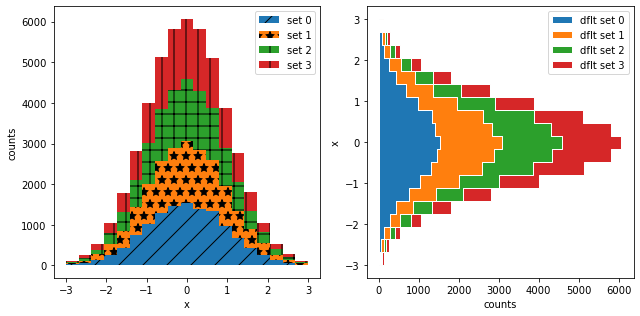

In [126]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 4.5), tight_layout=True)
arts = stack_hist(ax1, stack_data, color_cycle + label_cycle + hatch_cycle,
                  hist_func=hist_func)

arts = stack_hist(ax2, stack_data, color_cycle,
                  hist_func=hist_func,
                  plot_kwargs=dict(edgecolor='w', orientation='h'))
ax1.set_ylabel('counts')
ax1.set_xlabel('x')
ax2.set_xlabel('counts')
ax2.set_ylabel('x')